In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
%matplotlib inline

In [158]:
reviews = pd.read_csv('airbnb_reviews_textblob.csv', index_col='id')
listing = pd.read_csv('airbnb_listing_imagereco.csv', index_col='id')

In [159]:
listing.head(5)

,city,neighborhood,name,lat,lng,person_capacity,space_type,picture_url,price_rate,image_description,image_dominantfgColor,image_dominantbgColor
id,,,,,,,,,,,,
28103946,Toronto,Downtown Toronto,"Chic, Modern condo downtown by Scotiabank Arena!",43.64327,-79.38115,4,Entire condominium,https://a0.muscache.com/im/pictures/36fa807f-2...,38,a living room filled with furniture and a larg...,White,Black
11533218,Toronto,Downtown Toronto,Luxurious Condo near CN Tower with FREE PARKING,43.64252,-79.39617,4,Entire condominium,https://a0.muscache.com/im/pictures/a22f9757-3...,90,a close up of a stone building that has a benc...,Grey,Grey
12290314,Toronto,Downtown Toronto,Take in Panoramic City Views from a Sophistica...,43.65391,-79.38273,2,Entire condominium,https://a0.muscache.com/4ea/air/v2/pictures/f3...,113,a living room filled with furniture and a larg...,White,White
18254263,Toronto,Downtown Toronto,*City View Studio 3 mins to University and Sub...,43.66192,-79.38503,3,Entire condominium,https://a0.muscache.com/im/pictures/0f1e2974-0...,75,a kitchen with a dining room table,White,White
15239234,Toronto,Downtown Toronto,Designer penthouse loft w sunset balcony (King W),43.64628,-79.40063,2,Entire apartment,https://a0.muscache.com/im/pictures/09e2524d-e...,72,a living room,Black,Black


In [160]:
join_df = listing.join(reviews, how='inner')

Text(0.5, 1.0, 'Avg Polarity vs Foreground Color')

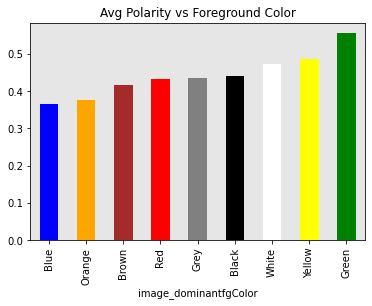

In [161]:
fgColor_Polarity = join_df.groupby(by='image_dominantfgColor')['Polarity'].mean().sort_values()
plot_fgColor_Polarity = fgColor_Polarity.plot(kind='bar', color=list(fgColor_Polarity.index.values))
plot_fgColor_Polarity.set_facecolor('0.90')
plot_fgColor_Polarity.set_title('Avg Polarity vs Foreground Color')
# reviews['Polarity'].loc[11533218].mean(axis=0)

Text(0.5, 1.0, 'Avg Polarity vs Background Color')

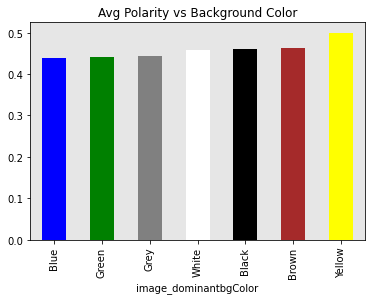

In [162]:
bgColor_Polarity = join_df.groupby(by='image_dominantbgColor')['Polarity'].mean().sort_values()
plot_bgColor_Polarity = bgColor_Polarity.plot(kind='bar', color=list(bgColor_Polarity.index.values))
plot_bgColor_Polarity.set_facecolor('0.90')
plot_bgColor_Polarity.set_title('Avg Polarity vs Background Color')

Text(0.5, 1.0, 'Avg Price vs Foreground Color')

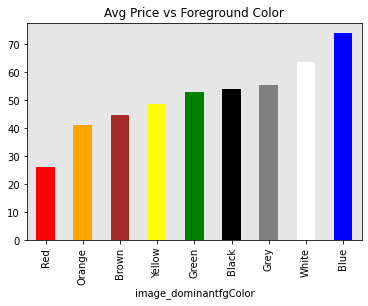

In [163]:
fgcolor_price = join_df.groupby(by='image_dominantfgColor')['price_rate'].mean().sort_values()
plot_fgcolor_price = fgcolor_price.plot(kind='bar', color=list(fgcolor_price.index.values))
plot_fgcolor_price.set_facecolor('0.90')
plot_fgcolor_price.set_title('Avg Price vs Foreground Color')

Text(0.5, 1.0, 'Avg Price vs Background Color')

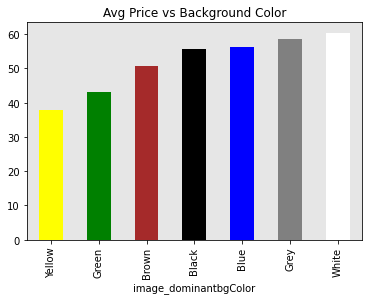

In [164]:
bgcolor_price = join_df.groupby(by='image_dominantbgColor')['price_rate'].mean().sort_values()
plot_bgcolor_price = bgcolor_price.plot(kind='bar', color=list(bgcolor_price.index.values))
plot_bgcolor_price.set_facecolor('0.90')
plot_bgcolor_price.set_title('Avg Price vs Background Color')

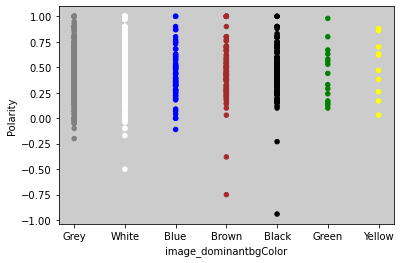

In [183]:
join_df.reset_index().plot(kind='scatter', x='image_dominantbgColor', y='Polarity', c='image_dominantbgColor').set_facecolor('0.80')

In [167]:
join_df.describe()

,lat,lng,person_capacity,price_rate,rating,Polarity
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,43.656215,-79.390411,3.135757,58.089021,4.712166,0.452901
std,0.021258,0.039300,1.473890,21.983515,0.662003,0.235778
min,43.596710,-79.536156,1.000000,11.000000,1.000000,-0.940000
25%,43.642490,-79.403710,2.000000,43.000000,5.000000,0.300000
50%,43.648440,-79.388740,3.000000,56.000000,5.000000,0.430000
75%,43.663213,-79.377455,4.000000,75.000000,5.000000,0.590000
max,43.738670,-79.229900,9.000000,139.000000,5.000000,1.000000


In [168]:
join_df.loc[join_df['Polarity'] < 0].sort_values(by='Polarity').head(10)

,city,neighborhood,name,lat,lng,person_capacity,space_type,picture_url,price_rate,image_description,image_dominantfgColor,image_dominantbgColor,author,rating,comments,Polarity,Sentiment,Keywords_reviews
id,,,,,,,,,,,,,,,,,,
30567717,Toronto,Harbourfront,Beautiful Bachelor Suite with Amazing View!,43.641210,-79.382260,2,Entire condominium,https://a0.muscache.com/im/pictures/f3c63bd7-c...,52,a tall building in a city,Black,Black,Harris,5,"You will not be disappointed, go ahead and book!",-0.94,Negative,book
12007026,Toronto,Downtown Toronto,3min Downtown YONGE/ BLOOR QUEENBED CLEAN,43.668500,-79.385960,2,Private room,https://a0.muscache.com/im/pictures/50f80400-b...,38,a kitchen with a wood floor,Orange,Brown,Isabela,2,Expect fucking frying smell at 10 in the eveni...,-0.75,Negative,"evening, fucking frying smell"
17682453,Toronto,Palmerston/Little Italy,Room Slick Monochome. - Little Italy,43.663190,-79.411240,2,Private room,https://a0.muscache.com/im/pictures/736569d6-e...,25,a bedroom with a bed and desk in a room,White,White,Juana,1,"absolutely gross room , there was mold in the ...",-0.50,Negative,"spiders, iam allergic, mold, mosquitoes, horri..."
27705416,Toronto,Downtown Toronto,LUXURY LIVING IN THE HEART OF DOWNTOWN TORONTO,43.639190,-79.399530,4,Entire apartment,https://a0.muscache.com/im/pictures/10dd5390-2...,44,a living room filled with furniture and a larg...,White,Brown,Tarik,1,The place Iâ€™ve very small and uncomfortable....,-0.38,Negative,"ve, place iâ, owner"
21984758,Toronto,Downtown Toronto,Centrally Located Condo With Beautiful Lake View,43.640010,-79.393490,6,Entire condominium,https://a0.muscache.com/im/pictures/44d9a22e-f...,53,a lit up city at night,Black,Black,Joe,3,It was no really good experience no internet s...,-0.23,Negative,"good experience, tv, internet service, canâ, t..."
15082256,Toronto,Downtown Toronto,LUXURY! Prime Location+CN Tower View! FREE PA...,43.642580,-79.381570,8,Entire condominium,https://a0.muscache.com/im/pictures/3785b73b-2...,89,a view of a city with tall buildings in the ba...,Grey,Grey,Cali,4,"Nice place, insane view!",-0.20,Negative,"nice place, insane view"
15903030,Toronto,Garden District,Cozy 2 Bedrooms Loft at Downtown Core,43.654530,-79.373520,8,Entire apartment,https://a0.muscache.com/im/pictures/8f8c742c-0...,71,a kitchen with a wood floor,White,White,Kiran,1,Everything about this location was a bit disap...,-0.17,Negative,"coffee machine, kitchen exhaust, old coffee gr..."
19202117,Toronto,Downtown Toronto,Sleek Penthouse Condo at Super Location Downtown!,43.649040,-79.387920,3,Entire apartment,https://a0.muscache.com/im/pictures/d02708d7-3...,69,a tall glass building in a city,Grey,Blue,Cory,5,Close to everything downtown. If you arrive l...,-0.11,Negative,"bedroom unit, block, hr food mart, priced stu..."
21579122,Toronto,Downtown Toronto,55th+ Floor Lake View Suite By Union Station,43.641788,-79.381874,3,Entire condominium,https://a0.muscache.com/im/pictures/59dd22d3-e...,51,a tall building in a city,Black,White,Jennifer,4,Overall a nice place to stay. The TV never wor...,-0.10,Negative,"cable, host, stay, local tv, stick, previous g..."


In [169]:
reviews.loc[reviews.index == 30567717]

,author,rating,comments,Polarity,Sentiment,Keywords_reviews
id,,,,,,
30567717,James,5,Beautiful view!,1.00,Positve,beautiful view
30567717,Shahed,5,"Mike's Place is at an excellent location, walk...",0.36,Negative,"late check-in, mike's place, mike's apartment,..."
30567717,Harris,5,"You will not be disappointed, go ahead and book!",-0.94,Negative,book
30567717,John,5,We had a great time. Traveled for the Bruins g...,0.32,Negative,"great time, great communication, cn tower, wat..."
30567717,Cameron,5,Great price for an amazing location and condo!...,0.35,Negative,"great attractions, amazing location, great pri..."


In [170]:
listing.loc[listing.index == 30567717]

,city,neighborhood,name,lat,lng,person_capacity,space_type,picture_url,price_rate,image_description,image_dominantfgColor,image_dominantbgColor
id,,,,,,,,,,,,
30567717,Toronto,Harbourfront,Beautiful Bachelor Suite with Amazing View!,43.64121,-79.38226,2,Entire condominium,https://a0.muscache.com/im/pictures/f3c63bd7-c...,52,a tall building in a city,Black,Black
